In [8]:
from pycocotools.coco import COCO
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as img
import os
import json
import random
import numpy as np
%matplotlib inline
import seaborn as sns

In [2]:
train = '/opt/ml/detection/dataset/train.json'
coco = COCO(train)

base_path = '/opt/ml/detection/dataset'
img_path = os.path.join(base_path, coco.loadImgs(1)[0]['file_name'])
image = cv2.imread(img_path)

loading annotations into memory...
Done (t=1.25s)
creating index...
index created!


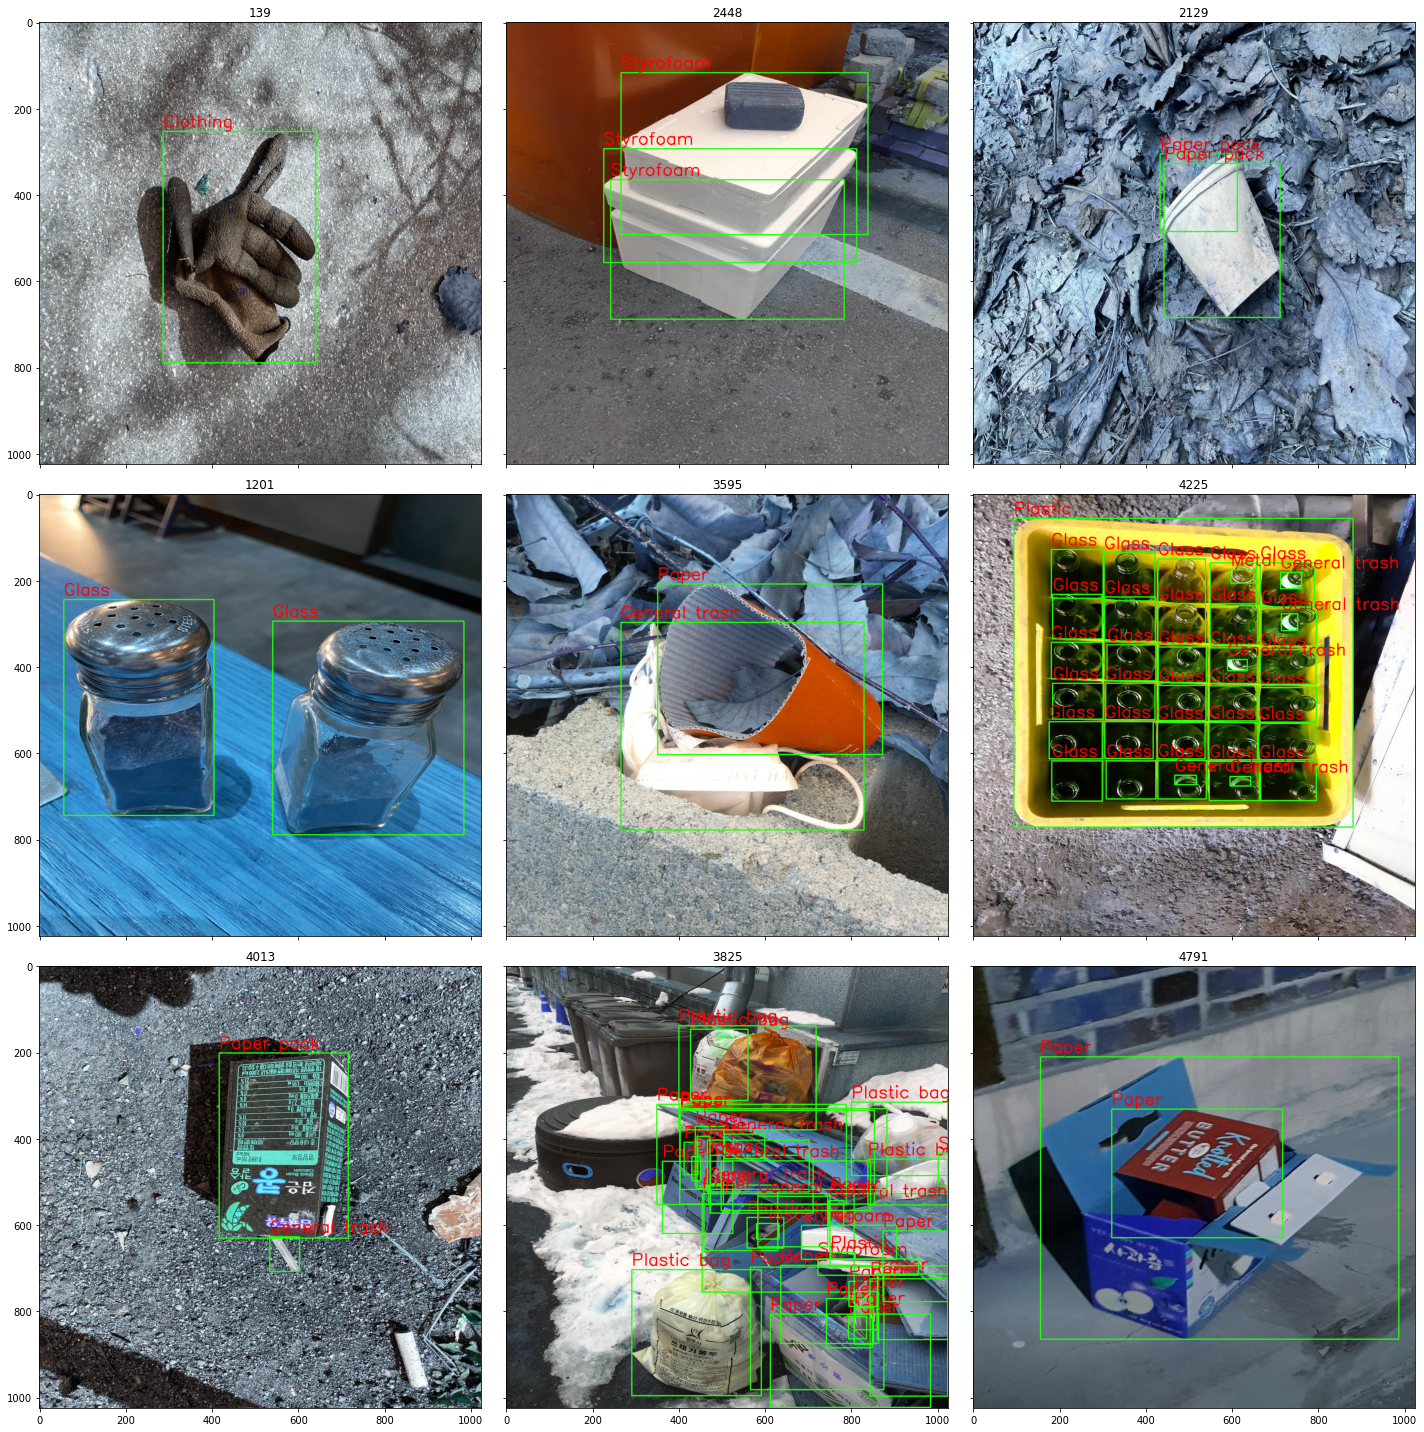

In [38]:
def get_ann(img_id, coco):
    return coco.getAnnIds(imgIds=img_id)

def get_img(img_id, coco):
    base_path = '/opt/ml/detection/dataset'
    img_path = os.path.join(base_path, coco.loadImgs(img_id)[0]['file_name'])
    image = cv2.imread(img_path)
    return image

def draw_bboxes(img_id, coco, ax):
    anns = get_ann(img_id, coco)
    image = get_img(img_id, coco)
    for ann in anns:
        x, y, w, h = map(int, coco.loadAnns(ann)[0]['bbox'])
        label = coco.loadCats(coco.loadAnns(ann)[0]['category_id'])[0]['name']
        image = cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.putText(image, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (255, 0, 0), 2)
    ax.imshow(image)

n_rows, n_cols = 3, 3
fig, ax = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, figsize=(20, 20))

index = list(map(int, np.random.randint(0, 4883-1, size=n_cols*n_rows)))
for i, idx in enumerate(index):
    draw_bboxes(idx, coco, ax[i%n_rows][i//(n_cols)])
    ax[i%n_rows][i//(n_cols)].set_title(idx)
plt.tight_layout()

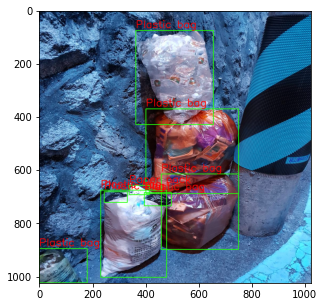

In [28]:
# 981
fig, axes = plt.subplots(1,1, figsize=(12,5))
draw_bboxes(981, coco, axes)

쓰레기 봉투 위에 조금만 튀어나온 부분을 paper pack인지 어케 아냐;;;

그리고 쓰레기 봉투는 그냥 비닐로 처리한다

/opt/conda/envs/detection/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


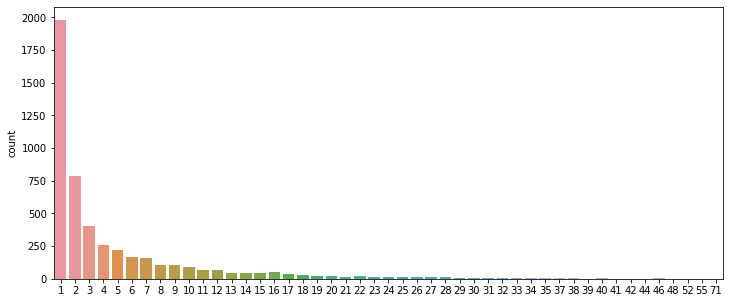

In [29]:
# 한 이미지당 box 개수
lst = []
for i in range(4883):
    lst.append(len(coco.getAnnIds(imgIds=i)))    

fig, axes = plt.subplots(1,1, figsize=(12,5))
sns.countplot(lst)
plt.show()

2000개 정도가 1개의 물체만 가지고 있다. -> 예측이 쉬운 데이터가 반정도 된다.

In [30]:
with open(train) as json_file:
    train_json = json.load(json_file)

/opt/conda/envs/detection/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


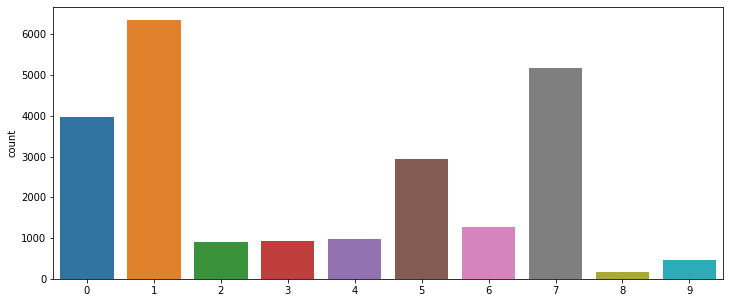

In [35]:
# category 분포
lst = []
for i in range(len(train_json['annotations'])):
    lst.append(coco.loadAnns(i)[0]['category_id'])

fig, axes = plt.subplots(1,1, figsize=(12,5))
sns.countplot(lst)
plt.show()

In [36]:
train_json['categories']

[{'id': 0, 'name': 'General trash', 'supercategory': 'General trash'},
 {'id': 1, 'name': 'Paper', 'supercategory': 'Paper'},
 {'id': 2, 'name': 'Paper pack', 'supercategory': 'Paper pack'},
 {'id': 3, 'name': 'Metal', 'supercategory': 'Metal'},
 {'id': 4, 'name': 'Glass', 'supercategory': 'Glass'},
 {'id': 5, 'name': 'Plastic', 'supercategory': 'Plastic'},
 {'id': 6, 'name': 'Styrofoam', 'supercategory': 'Styrofoam'},
 {'id': 7, 'name': 'Plastic bag', 'supercategory': 'Plastic bag'},
 {'id': 8, 'name': 'Battery', 'supercategory': 'Battery'},
 {'id': 9, 'name': 'Clothing', 'supercategory': 'Clothing'}]

general trash, paper, plastic, plastic bag이 많다.  

In [1]:
k means clustering

SyntaxError: invalid syntax (2223734523.py, line 1)